In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/FACE_MASK_DETECTION/Face_Mask/00000_Mask.jpg")

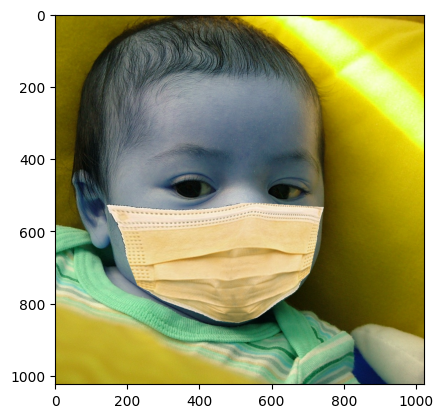

In [ ]:
plt.imshow(img_array) #BGR

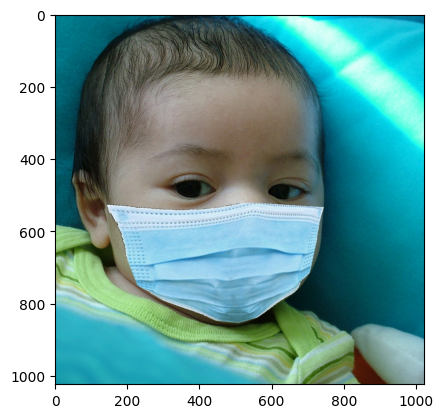

In [ ]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) #RGB

In [ ]:
img_array.shape #The 3 means RGB

(1024, 1024, 3)

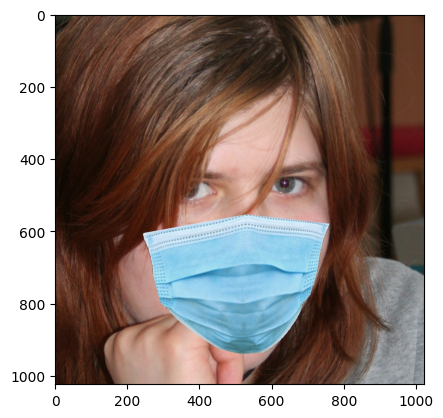

In [ ]:
training_Data = []
Datadirectory = "/content/drive/MyDrive/FACE_MASK_DETECTION/" #Training Dataset
Classes = ["Face_Mask","No_Mask"]
for cateory in Classes:
  path = os.path.join(Datadirectory,cateory)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

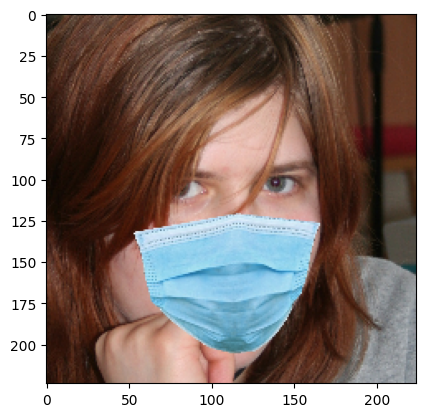

In [ ]:
img_size = 224 #Image Net = 224 x 224

new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
training_Data = [] #Data
def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory,category)
    class_num = Classes.index(category) #0 1, #label
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass

In [ ]:
create_training_Data() #Calling the Function

In [ ]:
print(len(training_Data))

1950


In [ ]:
import random
random.shuffle(training_Data) #So that the ML do not learn the sequence

In [ ]:
X = [] #Data
y = [] #Label
for features,label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [ ]:
X.shape

(1950, 224, 224, 3)

In [ ]:
#Normalize the Data
X = X/255.0;

In [ ]:
y[1000]

0

In [ ]:
Y = np.array(y)

In [ ]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet() #Pre-Trained Model

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
#For Transfer Learning - Tuning, Weights will start from the last check point
base_input = model.input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [ ]:
new_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 397s 7s/step - accuracy: 0.9648 - loss: 0.0665 - val_accuracy: 0.5333 - val_loss: 17.6763


In [ ]:
new_model.save('myfirstmodel.h5')

In [ ]:
new_model = tf.keras.models.load_model('myfirstmodel.h5')

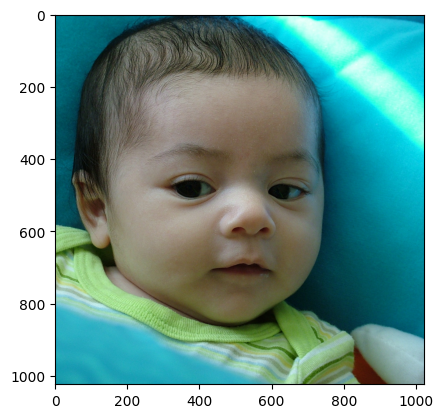

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/FACE_MASK_DETECTION/No_Mask/00000.png')
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [ ]:
Predicitions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


In [ ]:
Predicitions

array([[1.]], dtype=float32)

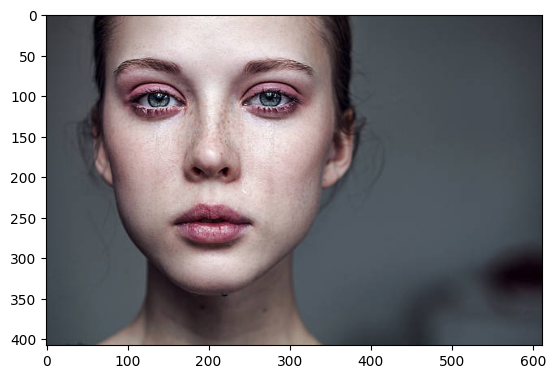

In [ ]:
frame = cv2.imread('/content/122.jpg')
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
frame.shape

(408, 612, 3)

In [ ]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [ ]:
Predicitions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [ ]:
Predicitions

array([[1.]], dtype=float32)

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(408, 612)

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = frame[y:y+h,x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print("Face not detected")
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey:ey+eh,ex:ex+ew]

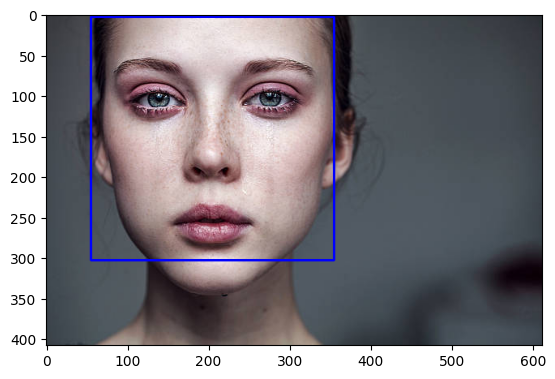

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

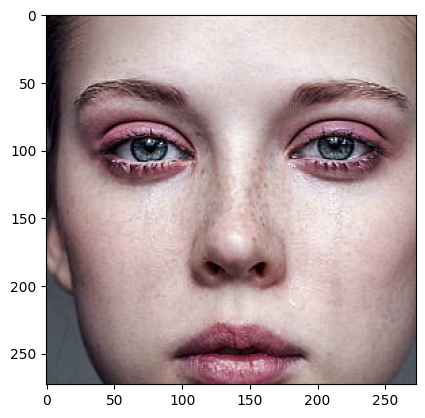

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [ ]:
Predicitions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [ ]:
Predicitions

array([[1.]], dtype=float32)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
new_model = load_model("myfirstmodel.h5")

path = "/content/haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))

text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# ✅ Use IVCam camera at index 0
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam (IVCam at index 0)")

while True:
    ret, frame = cap.read()

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (Predictions > 0):
        status = "No Mask"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1 + y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
    else:
        status = "Face Mask"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1 + y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0))

    cv2.imshow('Face Mask Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


OSError: Cannot open webcam (IVCam at index 0)